In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv('train_file.csv', encoding = "ISO-8859-1")
test_data = pd.read_csv('test_file.csv', encoding = "ISO-8859-1")
submission = pd.read_csv('sample_submission.csv', encoding = "ISO-8859-1")
test_id = test_data['IDLink']

In [3]:
train_data.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
0,Tr3CMgRv1N,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,-1,-1,-1,0.000000,-0.053300
1,Wc81vGp8qZ,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,-1,-1,-1,0.208333,-0.156386
2,zNGH03CrZH,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-1,-1,-1,-0.425210,0.139754
3,3sM1H0W8ts,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,-1,-1,-1,0.000000,0.026064
4,wUbnxgvqaZ,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,-1,-1,-1,0.000000,0.141084


In [4]:
test_data.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn
0,tFrqIR6Chj,Sliding Economy: FG fights back with N3trn TSA...,With the 2016 budget now passed by the Nationa...,BusinessDay,economy,2016-03-29 01:41:12,0,0,1
1,DVAaGErjlF,Microsoft shows how HoloLens can bring distant...,A recent Microsoft Research video shows how th...,Daily Mail,microsoft,2016-03-29 01:41:27,121,2,13
2,OT9UIZm5M2,"Microsoftâs Twitter Robot Praises Hitler, Tr...",* Microsoft teamed with Bing to create TayTwee...,EURweb,microsoft,2016-03-29 01:47:00,12,1,0
3,lflGp3q2Fj,Flood of Central Bank Moves Can't Get World Ec...,Central bankers have managed to steer the worl...,Bloomberg via Yahoo! Finance,economy,2016-03-29 02:00:00,0,0,3
4,zDYG0SoovZ,USD/JPY: bears lining up on mixed U.S. economy...,"However, this streak of seven-day gains might ...",FXStreet,economy,2016-03-29 02:01:07,3,0,0


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55932 entries, 0 to 55931
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDLink             55932 non-null  object 
 1   Title              55932 non-null  object 
 2   Headline           55932 non-null  object 
 3   Source             55757 non-null  object 
 4   Topic              55932 non-null  object 
 5   PublishDate        55932 non-null  object 
 6   Facebook           55932 non-null  int64  
 7   GooglePlus         55932 non-null  int64  
 8   LinkedIn           55932 non-null  int64  
 9   SentimentTitle     55932 non-null  float64
 10  SentimentHeadline  55932 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 4.7+ MB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37288 entries, 0 to 37287
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   IDLink       37288 non-null  object
 1   Title        37288 non-null  object
 2   Headline     37288 non-null  object
 3   Source       37187 non-null  object
 4   Topic        37288 non-null  object
 5   PublishDate  37288 non-null  object
 6   Facebook     37288 non-null  int64 
 7   GooglePlus   37288 non-null  int64 
 8   LinkedIn     37288 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


In [7]:
train_data.describe()

,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
count,55932.000000,55932.000000,55932.000000,55932.000000,55932.000000
mean,132.050329,4.551616,14.300132,-0.006318,-0.029577
std,722.931314,21.137177,76.651420,0.137569,0.143038
min,-1.000000,-1.000000,-1.000000,-0.838525,-0.755355
25%,0.000000,0.000000,0.000000,-0.079057,-0.116927
50%,6.000000,0.000000,0.000000,0.000000,-0.027277
75%,37.000000,2.000000,4.000000,0.063969,0.057354
max,49211.000000,1267.000000,3716.000000,0.962354,0.964646


In [8]:
test_data.describe()

,Facebook,GooglePlus,LinkedIn
count,37288.000000,37288.000000,37288.000000
mean,84.832654,2.895516,19.928181
std,420.063477,13.538942,225.443395
min,-1.000000,-1.000000,-1.000000
25%,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000
75%,28.000000,2.000000,4.000000
max,16598.000000,1016.000000,20341.000000


In [9]:
train_data.isnull().sum()

IDLink                 0
Title                  0
Headline               0
Source               175
Topic                  0
PublishDate            0
Facebook               0
GooglePlus             0
LinkedIn               0
SentimentTitle         0
SentimentHeadline      0
dtype: int64

In [10]:
test_data.isnull().sum()

IDLink           0
Title            0
Headline         0
Source         101
Topic            0
PublishDate      0
Facebook         0
GooglePlus       0
LinkedIn         0
dtype: int64

In [11]:
train_data['Source'].value_counts()[:5]

Bloomberg         992
Reuters           763
ABC News          645
New York Times    573
The Guardian      551
Name: Source, dtype: int64

In [12]:
test_data['Source'].value_counts()[:5]

Bloomberg          740
Reuters            558
ABC News           453
New York Times     419
MSPoweruser.com    416
Name: Source, dtype: int64

After a thorough walk through the project, we found out that there were some missing values in the source column of both train 
and test data.
Then we checked for the sources and the result shows that there are 5 sources with Bloomberg being the most referred source.
Hence we decide to fill the missing values in the source column with Bloomberg source.

In [13]:
train_data['Source'] = train_data['Source'].fillna('Bloomberg')
test_data['Source'] = test_data['Source'].fillna('Bloomberg')


In [14]:
train_data.isnull().sum()

IDLink               0
Title                0
Headline             0
Source               0
Topic                0
PublishDate          0
Facebook             0
GooglePlus           0
LinkedIn             0
SentimentTitle       0
SentimentHeadline    0
dtype: int64

In [15]:
test_data.isnull().sum()

IDLink         0
Title          0
Headline       0
Source         0
Topic          0
PublishDate    0
Facebook       0
GooglePlus     0
LinkedIn       0
dtype: int64

In [16]:
train_data['Source'].value_counts()[:5]

Bloomberg         1167
Reuters            763
ABC News           645
New York Times     573
The Guardian       551
Name: Source, dtype: int64

In [17]:
test_data['Source'].value_counts()[:5]

Bloomberg          841
Reuters            558
ABC News           453
New York Times     419
MSPoweruser.com    416
Name: Source, dtype: int64

In [18]:
import datetime

In [19]:
from textblob import TextBlob
import nltk
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.decomposition import TruncatedSVD
from sklearn.svm import LinearSVR
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from wordcloud import WordCloud, STOPWORDS 

%matplotlib inline

In [20]:
def classical_data_stat(data):  
  """Inputs : dataset
    Outpus : some satistical about the datasets"""
  print('There are {} observations'.format(data.shape[0]))
  print('There are {} columns \n'.format(data.shape[1]))
  if not data.isnull().values.any():
    print('There are no missing values \n')
  else :   
    print('There are  missing values \n')
classical_data_stat(train_data)

There are 55932 observations
There are 11 columns 

There are no missing values 



In [21]:
classical_data_stat(test_data)

There are 37288 observations
There are 9 columns 

There are no missing values 



# Data Cleaning and Preprocessing

### What is StopWords?

Stop words are a set of commonly used words in a language. Examples of stop words in English are “a”, “the”, “is”, “are” and etc. 
Stop words are commonly used in Text Mining and Natural Language Processing (NLP) to eliminate words that are so commonly used 
that they carry very little useful information.

For example, in the context of a search system, if your search query is “what is a stop word?”,  you want the search system to
focus on surfacing documents that talk about stop word over documents that talk about what is a.

### What is WordNET?

WordNET is a lexical database of words in more than 200 languages in which we have adjectives, adverbs, nouns, and verbs 
grouped differently into a set of cognitive synonyms, where each word in the database is expressing its distinct concept.

### Concept of normalization.
We use stemming and lemmatization for normalization of texts

We create a function for cleaning of texts.
Cleaning involves removing of numbers, urls and delimiters from the statements.
Conversion of texts into lower case.
Tokenization - Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. 
               Each of these smaller units are called tokens.

In [22]:
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 


def cleaned_data(text):
    
    text=text.replace('{html}',"")
    
    rem_url=re.sub(r'http\S+', '',text)
    
    rem_num = re.sub('[0-9]+', '', rem_url)
    
    clean_text = rem_num.replace(r"[^a-zA-Z]+", '')
    
    final_text = clean_text.replace(',', '').replace('.', '').replace(':', '')
    
    tokenized_text = word_tokenize(final_text)
    
    filtered_words = ' '.join([w.lower() for w in tokenized_text if w.lower() not in stop_words and len(w) > 2])
    
    stem_words=[stemmer.stem(w) for w in filtered_words]
    
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    
    return filtered_words




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


We then concatenate the Title , Source and Topic column of both train and test data into one for applying the cleaned_data() 

In [23]:
train_data['Text_Title'] = train_data['Title'] + ' ' + train_data['Source'] + ' ' + train_data['Topic']
test_data['Text_Title'] = test_data['Title'] + ' ' + test_data['Source'] + ' ' + test_data['Topic']

train_data['Text_Headline'] = train_data['Headline'] + ' ' + train_data['Source'] + ' ' + train_data['Topic']
test_data['Text_Headline'] = test_data['Headline'] + ' ' + test_data['Source'] + ' ' + test_data['Topic']

In [24]:
train_data['Text_Title'][4]

'Tourism, govt spending buoys Thai economy in January The Nation - Thailand&#39;s English news economy'

In [25]:
train_data['Text_Title'] = [cleaned_data(x) for x in train_data['Text_Title']]

In [26]:
test_data['Text_Title'] = [cleaned_data(x) for x in test_data['Text_Title']]

train_data['Text_Headline'] = [cleaned_data(x) for x in train_data['Text_Headline']]
test_data['Text_Headline'] = [cleaned_data(x) for x in test_data['Text_Headline']]

In [27]:
train_data['Text_Title'][4]

'tourism govt spending buoys thai economy january nation thailand english news economy'

# Word Cloud

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. It is often found on social networks,
it is a tool widely used by digital marketers

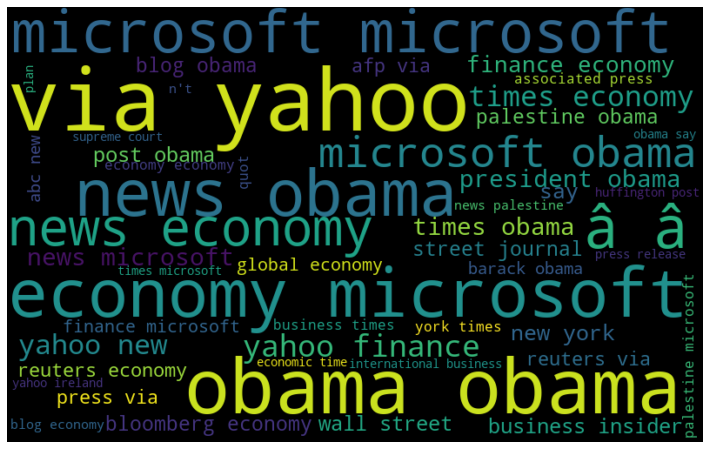

In [28]:

text = ""
for ind, row in train_data.iterrows():
    text += row["Text_Title"] + " "
text = text.strip()

wordcloud = WordCloud(width=800, height=500, max_font_size=100, max_words=50, background_color='black').generate(text)
wordcloud.recolor(random_state=ind*312)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



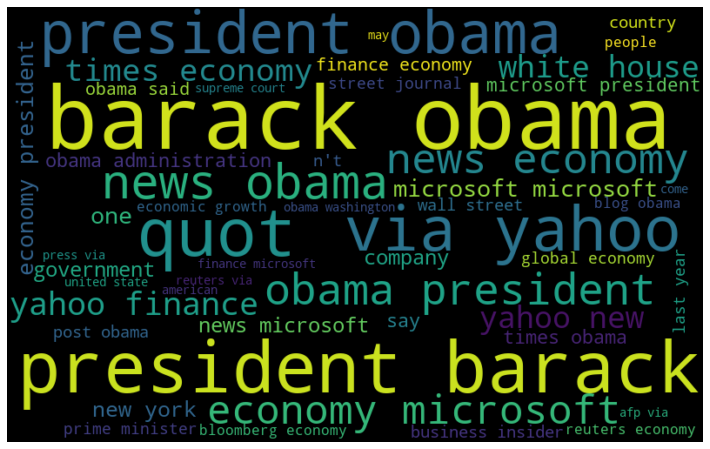

In [29]:
text = ""
for ind, row in train_data.iterrows():
    text += row["Text_Headline"] + " "
text = text.strip()

wordcloud = WordCloud(width=800, height=500, max_font_size=100, max_words=50, background_color='black').generate(text)
wordcloud.recolor(random_state=ind*312)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [30]:
#vectorizer = TfidfVectorizer()
#vectors = vectorizer.fit_transform(train_data['Text_Title'])


In [31]:
#print(len(vectorizer.vocabulary_))

In [32]:
#vectorizer.vocabulary_

In [33]:
#print(vectors)

In [34]:
#feature_names = vectorizer.get_feature_names()
#for col in vectors.nonzero()[1]:
    #print(feature_names[col], '-', vectors[0, col])

### TFIDF VECTORIZER

TF-IDF is an information retrieval and information extraction subtask which aims to express the importance of a word to a 
document which is part of a colection of documents which we usually name a corpus.

In [35]:
vectorizer = TfidfVectorizer(use_idf=True)

Title_train = vectorizer.fit_transform(train_data['Text_Title'])
Title_test = vectorizer.transform(test_data['Text_Title'])

vectorizer_ = TfidfVectorizer()

Headline_train = vectorizer_.fit_transform(train_data['Text_Headline'])
Headline_test = vectorizer_.transform(test_data['Text_Headline'])

### TextBlob

Textblob is an open-source python library for processing textual data. It performs different operations on textual 
data such as noun phrase extraction, sentiment analysis, classification, translation, etc. 

In [36]:
train_data['check_polarity_title'] = train_data['Title'].apply(lambda x: TextBlob(x).sentiment.polarity)
test_data['check_polarity_title'] = test_data['Title'].apply(lambda x: TextBlob(x).sentiment.polarity)

train_data['check_subjectivity_title'] = train_data['Title'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
test_data['check_subjectivity_title'] = test_data['Title'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [37]:
train_data['check_polarity_headline'] = train_data['Headline'].apply(lambda x: TextBlob(x).sentiment.polarity)
test_data['check_polarity_headline'] = test_data['Headline'].apply(lambda x: TextBlob(x).sentiment.polarity)

train_data['check_subjectivity_headline'] = train_data['Headline'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
test_data['check_subjectivity_headline'] = test_data['Headline'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [38]:
encoder = LabelEncoder()

#assigning numerical values to categorical data

drop_first = True
train_data['Topic'] = encoder.fit_transform(train_data['Topic'])
train_data['Source'] = encoder.fit_transform(train_data['Source'])


In [39]:
drop_first = True
test_data['Topic'] = encoder.fit_transform(test_data['Topic'])
test_data['Source'] = encoder.fit_transform(test_data['Source'])


### Get day from datetime

In [40]:


weekdays_in_train = []
weekdays_in_test = []

for i in train_data['PublishDate']:
    weekdays_in_train.append(datetime.datetime.strptime(i, "%Y-%m-%d %H:%M:%S").strftime("%A"))
    
for i in test_data['PublishDate']:
    weekdays_in_test.append(datetime.datetime.strptime(i, "%Y-%m-%d %H:%M:%S").strftime("%A"))

train_data['weekday'] = weekdays_in_train
test_data['weekday'] = weekdays_in_test


# convert weekday to 0-6

train_data['weekday'] = train_data['weekday'].map({'Monday': 0,
                                                   'Tuesday': 1,
                                                   'Wednesday': 2,
                                                   'Thursday': 3,
                                                   'Friday': 4,
                                                   'Saturday': 5,
                                                   'Sunday': 6})

test_data['weekday'] = test_data['weekday'].map({'Monday': 0,
                                                 'Tuesday': 1,
                                                 'Wednesday': 2,
                                                 'Thursday': 3,
                                                 'Friday': 4,
                                                 'Saturday': 5,
                                                 'Sunday': 6})

### Extracting Hour from date

In [41]:
train_data["hour"] = train_data["PublishDate"].apply(lambda x: x.split()[1].split(':')[0])
test_data["hour"] = test_data["PublishDate"].apply(lambda x: x.split()[1].split(':')[0])

### Hour distribution of SentimentTitle

Text(0, 0.5, 'SentimentTitle')

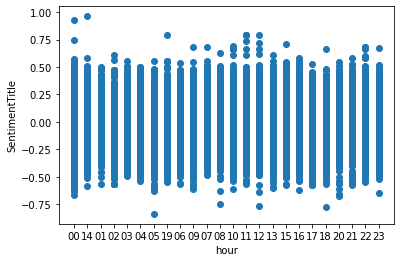

In [42]:
plt.scatter(train_data['hour'], train_data['SentimentTitle'])
plt.xlabel('hour')
plt.ylabel('SentimentTitle')

### Hour distribution of SentimentHeadline

Text(0, 0.5, 'SentimentHeadline')

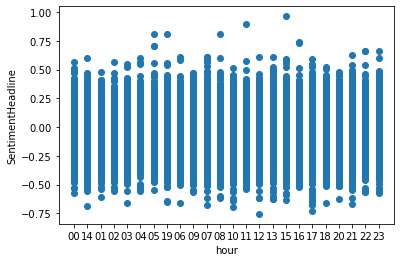

In [43]:
plt.scatter(train_data['hour'], train_data['SentimentHeadline'])
plt.xlabel('hour')
plt.ylabel('SentimentHeadline')

### Weekday distribution of SentimentTitle

Text(0, 0.5, 'SentimentTitle')

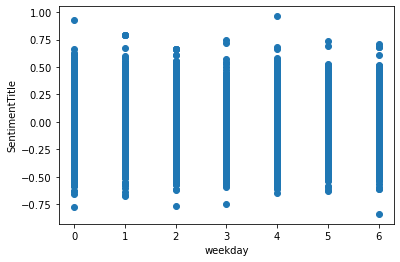

In [44]:
plt.scatter(train_data['weekday'], train_data['SentimentTitle'])
plt.xlabel('weekday')
plt.ylabel('SentimentTitle')

### Distribution of SentimentHeadline by Weekday 


Text(0, 0.5, 'SentimentHeadline')

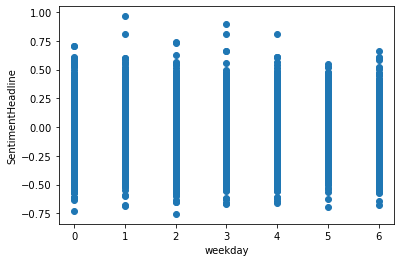

In [45]:
plt.scatter(train_data['weekday'], train_data['SentimentHeadline'])
plt.xlabel('weekday')
plt.ylabel('SentimentHeadline')

### FOR TITLE

In [46]:
# Counting number of words in the Title 
train_data["num_words_t"] = train_data["Text_Title"].apply(lambda x: len(str(x).split()))
test_data["num_words_t"] = test_data["Text_Title"].apply(lambda x: len(str(x).split()))



# Counting number of unique words in the Title 
train_data["num_unique_words_t"] = train_data["Text_Title"].apply(lambda x: len(set(str(x).split())))
test_data["num_unique_words_t"] = test_data["Text_Title"].apply(lambda x: len(set(str(x).split())))



# Counting number of characters in the Title 
train_data["num_chars_t"] = train_data["Text_Title"].apply(lambda x: len(str(x)))
test_data["num_chars_t"] = test_data["Text_Title"].apply(lambda x: len(str(x)))



# Evaluating Average length of the words in the Title 
train_data["mean_word_len_t"] = train_data["Text_Title"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
test_data["mean_word_len_t"] = test_data["Text_Title"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

### FOR HEADLINE

In [47]:
# Counting number of words in the Headline 
train_data["num_words_h"] = train_data["Text_Headline"].apply(lambda x: len(str(x).split()))
test_data["num_words_h"] = test_data["Text_Headline"].apply(lambda x: len(str(x).split()))



# Counting number of unique words in the Headline 
train_data["num_unique_words_h"] = train_data["Text_Headline"].apply(lambda x: len(set(str(x).split())))
test_data["num_unique_words_h"] = test_data["Text_Headline"].apply(lambda x: len(set(str(x).split())))



# Counting number of characters in the Headline 
train_data["num_chars_h"] = train_data["Text_Headline"].apply(lambda x: len(str(x)))
test_data["num_chars_h"] = test_data["Text_Headline"].apply(lambda x: len(str(x)))



# Evaluating Average length of the words in the Headline 
train_data["mean_word_len_h"] = train_data["Text_Headline"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
test_data["mean_word_len_h"] = test_data["Text_Headline"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [48]:
test_data.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,Text_Title,...,weekday,hour,num_words_t,num_unique_words_t,num_chars_t,mean_word_len_t,num_words_h,num_unique_words_h,num_chars_h,mean_word_len_h
0,tFrqIR6Chj,Sliding Economy: FG fights back with N3trn TSA...,With the 2016 budget now passed by the Nationa...,433,0,2016-03-29 01:41:12,0,0,1,sliding economy fights back ntrn tsa funds bus...,...,1,01,9,8,62,6.000000,14,14,114,7.214286
1,DVAaGErjlF,Microsoft shows how HoloLens can bring distant...,A recent Microsoft Research video shows how th...,739,1,2016-03-29 01:41:27,121,2,13,microsoft shows hololens bring distant family ...,...,1,01,10,9,74,6.500000,16,15,120,6.562500
2,OT9UIZm5M2,"Microsoftâs Twitter Robot Praises Hitler, Tr...",* Microsoft teamed with Bing to create TayTwee...,879,1,2016-03-29 01:47:00,12,1,0,microsoftâs twitter robot praises hitler tru...,...,1,01,10,10,80,7.100000,38,34,308,7.131579
3,lflGp3q2Fj,Flood of Central Bank Moves Can't Get World Ec...,Central bankers have managed to steer the worl...,345,0,2016-03-29 02:00:00,0,0,3,flood central bank moves n't get world economy...,...,1,02,14,13,86,5.214286,20,19,138,5.950000
4,zDYG0SoovZ,USD/JPY: bears lining up on mixed U.S. economy...,"However, this streak of seven-day gains might ...",1015,0,2016-03-29 02:01:07,3,0,0,usd/jpy bears lining mixed economy outlook fxs...,...,1,02,8,7,59,6.500000,16,15,113,6.125000


In [49]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37288 entries, 0 to 37287
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IDLink                       37288 non-null  object 
 1   Title                        37288 non-null  object 
 2   Headline                     37288 non-null  object 
 3   Source                       37288 non-null  int32  
 4   Topic                        37288 non-null  int32  
 5   PublishDate                  37288 non-null  object 
 6   Facebook                     37288 non-null  int64  
 7   GooglePlus                   37288 non-null  int64  
 8   LinkedIn                     37288 non-null  int64  
 9   Text_Title                   37288 non-null  object 
 10  Text_Headline                37288 non-null  object 
 11  check_polarity_title         37288 non-null  float64
 12  check_subjectivity_title     37288 non-null  float64
 13  check_polarity_h

In [50]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55932 entries, 0 to 55931
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IDLink                       55932 non-null  object 
 1   Title                        55932 non-null  object 
 2   Headline                     55932 non-null  object 
 3   Source                       55932 non-null  int32  
 4   Topic                        55932 non-null  int32  
 5   PublishDate                  55932 non-null  object 
 6   Facebook                     55932 non-null  int64  
 7   GooglePlus                   55932 non-null  int64  
 8   LinkedIn                     55932 non-null  int64  
 9   SentimentTitle               55932 non-null  float64
 10  SentimentHeadline            55932 non-null  float64
 11  Text_Title                   55932 non-null  object 
 12  Text_Headline                55932 non-null  object 
 13  check_polarity_t

In [51]:
train_data.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,...,weekday,hour,num_words_t,num_unique_words_t,num_chars_t,mean_word_len_t,num_words_h,num_unique_words_h,num_chars_h,mean_word_len_h
0,Tr3CMgRv1N,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,4121,2,2002-04-02 00:00:00,-1,-1,-1,0.000000,...,1,00,9,8,61,5.888889,17,14,116,5.882353
1,Wc81vGp8qZ,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",431,0,2008-09-20 00:00:00,-1,-1,-1,0.208333,...,5,00,6,5,45,6.666667,17,16,126,6.470588
2,zNGH03CrZH,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",431,0,2012-01-28 00:00:00,-1,-1,-1,-0.425210,...,5,00,7,6,53,6.714286,16,13,127,7.000000
3,3sM1H0W8ts,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,3016,0,2015-03-01 00:06:00,-1,-1,-1,0.000000,...,6,00,6,6,36,5.166667,20,18,162,7.150000
4,wUbnxgvqaZ,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,3794,0,2015-03-01 00:11:00,-1,-1,-1,0.000000,...,6,00,12,11,85,6.166667,21,19,167,7.000000


## The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. 

#### StandardScaler() will normalize the features i.e. each column of X, INDIVIDUALLY, so that each column/feature/variable will have μ = 0 and σ = 1.

In [52]:
columns_taken = ['Source', 'Topic', 'Facebook', 'GooglePlus', 'LinkedIn', 'num_words_t', 'num_unique_words_t', 'num_chars_t', 'mean_word_len_t',
        'num_words_h', 'num_unique_words_h', 'num_chars_h', 'mean_word_len_h', 'hour', 'weekday']

scaler = StandardScaler()  

for col in columns_taken:
  train_data[col] = scaler.fit_transform(train_data[col].values.reshape(-1, 1))
  test_data[col] = scaler.transform(test_data[col].values.reshape(-1, 1))

In [53]:
cols_title= ['Source', 'Topic', 'Facebook', 'GooglePlus', 'LinkedIn', 'num_words_t', 'num_unique_words_t', 'num_chars_t', 'mean_word_len_t', 'check_polarity_title', 'check_subjectivity_title', 'hour', 'weekday']
train_X1 = train_data[cols_title]
test_X1 = test_data[cols_title]

cols_headline = ['Source', 'Topic', 'Facebook', 'GooglePlus', 'LinkedIn', 'num_words_h', 'num_unique_words_h', 'num_chars_h', 'mean_word_len_h', 'check_polarity_headline', 'check_subjectivity_headline', 'hour', 'weekday']
train_X2 = train_data[cols_headline]
test_X2 = test_data[cols_headline]

In [54]:
train_X1.head()

,Source,Topic,Facebook,GooglePlus,LinkedIn,num_words_t,num_unique_words_t,num_chars_t,mean_word_len_t,check_polarity_title,check_subjectivity_title,hour,weekday
0,1.249746,0.841443,-0.184044,-0.262649,-0.199608,-0.239893,-0.287362,-0.547085,-0.646561,0.0,0.0,-1.699073,-0.795924
1,-1.323992,-1.108773,-0.184044,-0.262649,-0.199608,-1.651189,-1.702464,-1.596289,0.237229,0.0,0.0,-1.699073,1.338369
2,-1.323992,-1.108773,-0.184044,-0.262649,-0.199608,-1.180757,-1.230763,-1.071687,0.291339,0.0,0.0,-1.699073,1.338369
3,0.479020,-1.108773,-0.184044,-0.262649,-0.199608,-1.651189,-1.230763,-2.186466,-1.467224,0.0,0.0,-1.699073,1.871942
4,1.021667,-1.108773,-0.184044,-0.262649,-0.199608,1.171404,1.127740,1.026721,-0.330922,0.0,0.0,-1.699073,1.871942


In [55]:
test_X2.head()

,Source,Topic,Facebook,GooglePlus,LinkedIn,num_words_h,num_unique_words_h,num_chars_h,mean_word_len_h,check_polarity_headline,check_subjectivity_headline,hour,weekday
0,-1.322597,-1.108773,-0.182661,-0.215339,-0.173516,-0.652717,-0.510753,-0.515047,0.897696,0.000000,0.000000,-1.555397,-0.795924
1,-1.109165,-0.133665,-0.015286,-0.120718,-0.016962,-0.400010,-0.365741,-0.412710,-0.087553,0.000000,0.250000,-1.555397,-0.795924
2,-1.011516,-0.133665,-0.166062,-0.168028,-0.186562,2.379763,2.389480,2.793857,0.772675,-0.157407,0.251852,-1.555397,-0.795924
3,-1.383976,-1.108773,-0.182661,-0.215339,-0.147424,0.105403,0.214305,-0.105698,-1.013418,0.087500,0.272917,-1.411721,-0.795924
4,-0.916658,-1.108773,-0.178511,-0.215339,-0.186562,-0.400010,-0.365741,-0.532103,-0.748885,0.000000,0.000000,-1.411721,-0.795924


In [56]:
print(np.shape(train_X1))
print(np.shape(test_X1))

(55932, 13)
(37288, 13)


In [57]:
print(np.shape(train_X2))
print(np.shape(test_X2))

(55932, 13)
(37288, 13)


In [58]:
print(np.shape(Title_train))
print(np.shape(Title_test))

(55932, 25555)
(37288, 25555)


In [59]:
print(np.shape(Headline_train))
print(np.shape(Headline_train))

(55932, 39485)
(55932, 39485)


In [60]:
from scipy.sparse import hstack, csr_matrix

In [61]:
train_X_Title = hstack([Title_train, csr_matrix(train_X1.values)])
test_X_Title = hstack([Title_test, csr_matrix(test_X1.values)])
y1 = train_data['SentimentTitle']

train_X_Headline = hstack([Headline_train, csr_matrix(train_X2.values)])
test_X_Headline = hstack([Headline_test, csr_matrix(test_X2.values)])
y2 = train_data['SentimentHeadline']


In [62]:
np.shape(train_X_Title)

(55932, 25568)

In [63]:
np.shape(train_X_Headline)

(55932, 39498)

## Using Machine Learning Model

### LinearSVR(Support Vector Regression)

In [64]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
X_train, X_test, y_train, y_test = train_test_split(train_X_Title, y1, test_size=0.20, random_state=42)


In [65]:
clf1 = LinearSVR(C=0.2)
clf1.fit(X_train, y_train)

y_pred1 = clf1.predict(X_test)
mae1 = mean_absolute_error(y_pred1, y_test)
print('MAE:', 1 - mae1)

MAE: 0.9434452533340362


C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [66]:
# LinearSVR model for SentimentHeadline

X_train, X_test, y_train, y_test = train_test_split(train_X_Headline, y2, test_size=0.20, random_state=42)

clf2 = LinearSVR(C=0.2)
clf2.fit(X_train, y_train)

y_pred2 = clf2.predict(X_test)
mae2 = mean_absolute_error(y_pred2, y_test)
print('MAE:', 1 - mae2)

MAE: 0.9291932863875307


C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [67]:
print('MAE:', 1 - ((0.4 * mae1) + (0.6 * mae2)))

MAE: 0.9348940731661329


In [68]:
title = clf1.predict(test_X_Title)
headline = clf2.predict(test_X_Headline)

In [90]:

df = pd.DataFrame()
df['IDLink'] = test_id
df['SentimentTitle'] = title
df['SentimentHeadline'] = headline
df.to_csv('final_submit_data', index=False)

In [91]:
df.to_excel('final_submit_data')

ValueError: No engine for filetype: ''